In [1]:
import cv2
import cvlib as cv

import glob
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
import json
from tqdm import tqdm_notebook


def load_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

Using TensorFlow backend.


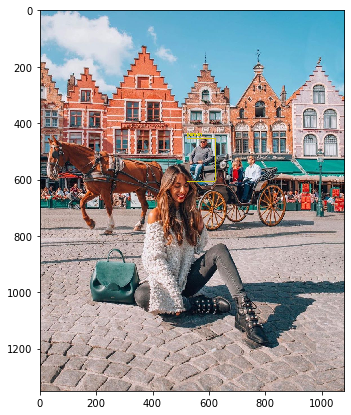

In [2]:
img = load_image('../data/pictures_lucyinthesskyy/lucyinthesskyy_038_10066Likes.png')

bbox, label, conf = cv.detect_common_objects(img)
bbox_init = [ bbox[idx] for idx in range(len(label)) if label[idx]=='person' ][0]

plt.figure(figsize=(7, 7))
plt.imshow(cv.object_detection.draw_bbox(img, [bbox_init], ['person'], [0.99]))
plt.show()

In [3]:
bbox, label, conf = cv.detect_common_objects(img)
area = [ (box[2]-box[0])*(box[3]-box[1]) for box in bbox ]
arranged_list = [ (area[idx], bbox[idx], conf[idx]) for idx in range(len(label)) if label[idx]=='person' ]
arranged_list.sort(reverse=True)
result_bbox_list = [ tup[1] for tup in arranged_list  ]

print('=== arranged list ===')
for item in arranged_list:
    print(item)

print('\n=== final bbox to be saved ===')
result_bbox_list

=== arranged list ===
(206480, [370, 532, 726, 1112], 0.8623359203338623)
(13348, [522, 456, 616, 598], 0.9890145063400269)
(10880, [701, 524, 781, 660], 0.7972378134727478)

=== final bbox to be saved ===


[[370, 532, 726, 1112], [522, 456, 616, 598], [701, 524, 781, 660]]

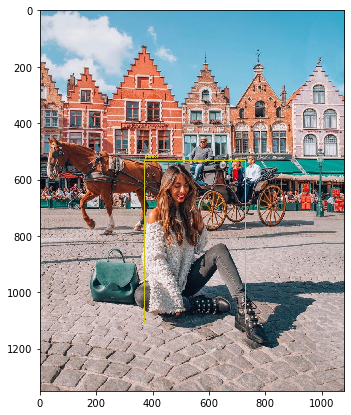

In [4]:
img = load_image('../data/pictures_lucyinthesskyy/lucyinthesskyy_038_10066Likes.png')

plt.figure(figsize=(7, 7))
plt.imshow(cv.object_detection.draw_bbox(img, [result_bbox_list[0]], ['person'], [0.99]))
plt.show()